<h1 style="text-align:center"><strong>Bike Sharing</strong></h1>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
plt.style.use('dark_background')

In [4]:
df_hour= pd.read_csv('hour.csv' , index_col=False)

In [5]:
df_day= pd.read_csv('day.csv' , index_col=False)

In [6]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
#dropping the index column
df_hour.drop(columns=['instant'], inplace=True)

In [8]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
#dropping the index column
df_day.drop(columns=['instant'], inplace=True)

<strong>Cleaning Day CSV </strong>

In [10]:
#converting dteday into date time object
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [11]:
#renaming columns for better clarity
df_day = df_day.rename(columns={'dteday':'Date' , 'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'})

<strong>Cleaning Hourly DataSet</strong>

In [12]:
#converting dteday into date time object
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [13]:
#renaming columns for better clarity
df_hour = df_hour.rename(columns={'dteday':'Date' , 'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'})

<h3>Daily Bike Rentals over time</h3>

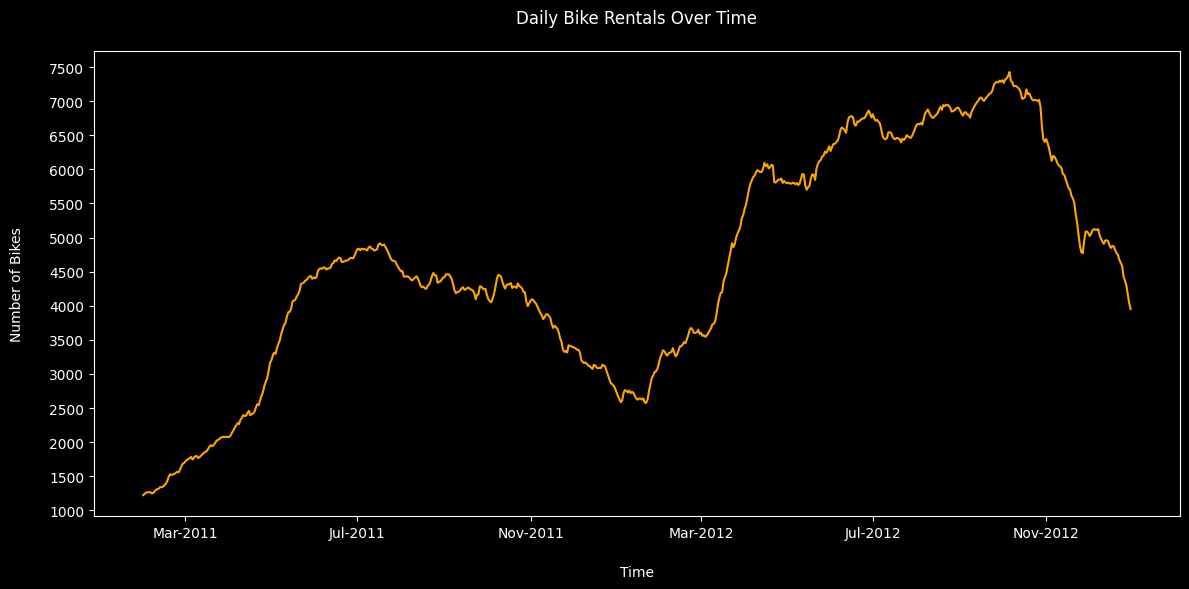

In [16]:
x=df_day['Date']
df_day['rolling_mean'] = df_day['count'].rolling(window=30).mean()
y=df_day['rolling_mean']
plt.figure(figsize=(12,6))
# Set major ticks every 3 months (quarterly)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))

# Format: short month - full year (e.g., Jan-2021)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))

plt.plot(x,y, color='orange')
plt.title("Daily Bike Rentals Over Time",pad=20)
plt.xlabel("Time",labelpad=18)
plt.ylabel("Number of Bikes",labelpad=18)

plt.tight_layout()

<h3>Rentals by day of week</h3>

In [15]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_day['weekday_names'] = df_day['weekday'].apply(lambda x : days[x])

In [16]:
#grouping sales by dates
day_sale=df_day.groupby('weekday_names')['count'].mean()

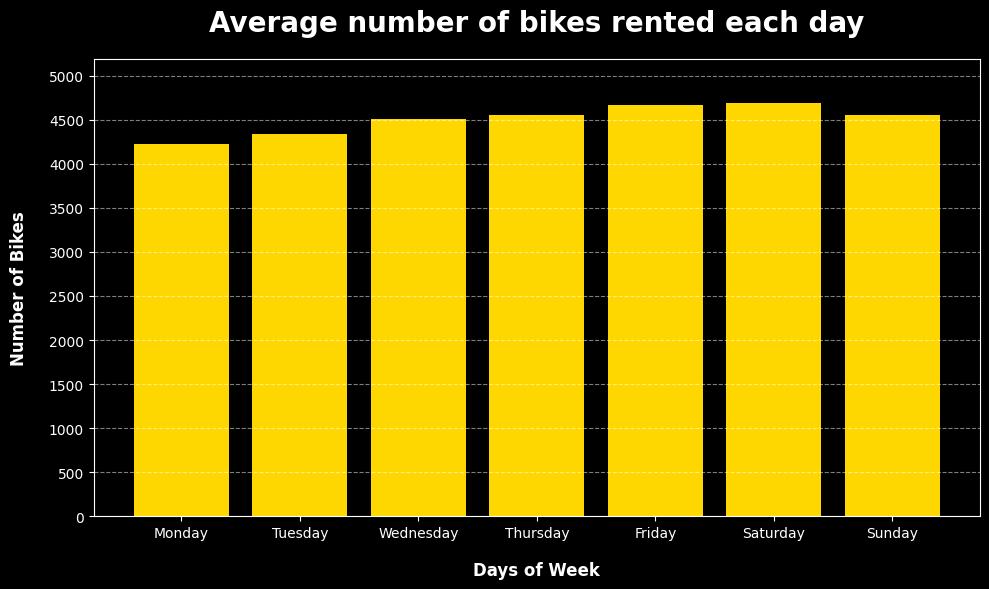

In [17]:
# Correct order of days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to fix day order
day_sale = day_sale.reindex(ordered_days)

x = day_sale.index
y = day_sale.values

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='gold')  # ← use bar instead of plot

plt.title("Average number of bikes rented each day", fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Days of Week', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Number of Bikes', fontsize=12, fontweight='bold', labelpad=15)

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))
plt.ylim(0, int(day_sale.max()) + 500)  # Extend above max for clarity

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.5, axis='y')  # Grid only on y-axis

plt.tight_layout()
plt.show()


<strong>Rentals by month (seasonality)</strong>

In [29]:
Monthly_Rentals=df_day.groupby('month_name')['count'].mean()

In [27]:
months =['January','February','March','April','May','June','July','August','September','October','November','December']


In [28]:
df_day['month_name'] = df_day['month'].apply(lambda x : months[x-1])

In [30]:
Monthly_Rentals=Monthly_Rentals.reindex(months)

In [31]:
x=Monthly_Rentals.index
y=Monthly_Rentals.values
x=x[::-1]
y=y[::-1]

<BarContainer object of 12 artists>

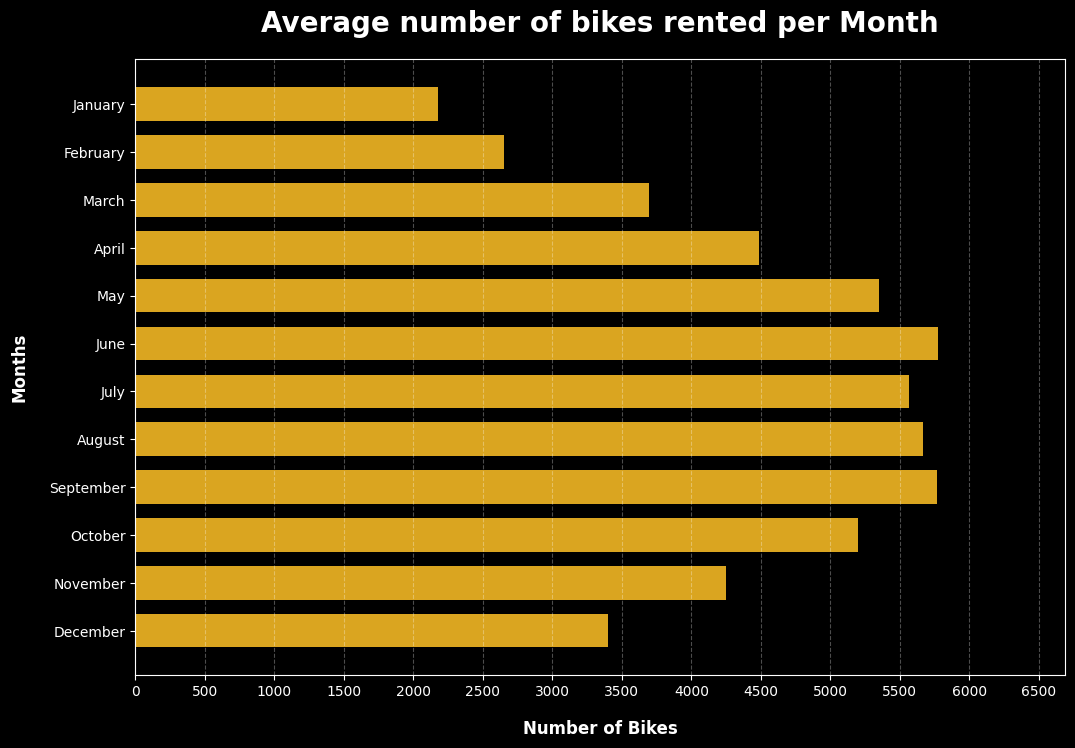

In [32]:
plt.figure(figsize=(12,8))
plt.title("Average number of bikes rented per Month", fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Number of Bikes', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Months', fontsize=12, fontweight='bold', labelpad=15)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))
plt.xlim(0, int(day_sale.max()) + 2000)  # Extend above max for clarity


plt.grid(True, axis='x', alpha=0.3, linestyle='--' )
plt.barh(x,y,color='#DAA520', height=0.7)

<h3> Phase 3: Weather Impact Analysis</h3>

In [33]:
df_day.head()

,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,rolling_mean,weekday_names,month_name
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN,Sunday,January
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN,Monday,January
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN,Tuesday,January
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN,Wednesday,January
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN,Thursday,January


In [34]:
df_day['atemp_celsius'] = df_day['atemp'] * 50
df_day_sorted = df_day.sort_values('atemp_celsius')
rolling_avg = df_day_sorted['count'].rolling(window=120).mean()


(0.0, 9214.0)

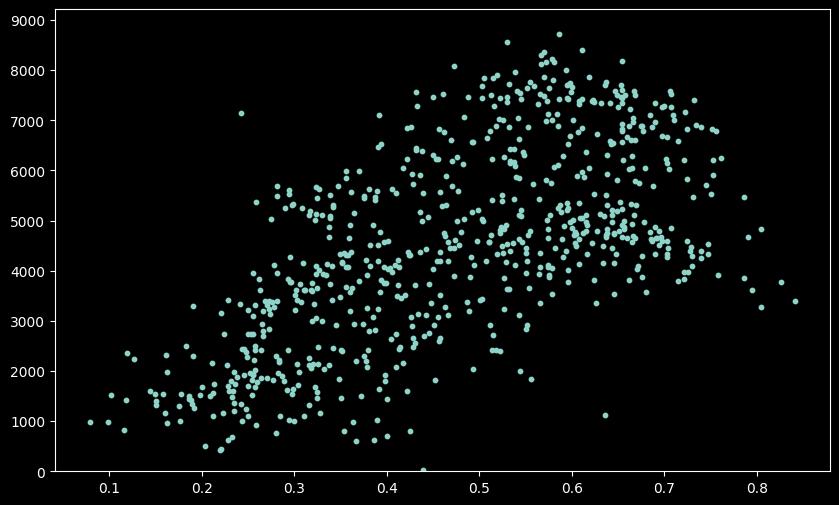

In [35]:

plt.figure(figsize=(10,6))
plt.scatter(df_day_sorted['atemp'], df_day_sorted['count'], s=10)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.ylim(0, int(df_day['count'].max()) + 500)  # Extend above max for clarity

<strong>Bar plot of average rentals per weather condition.</strong>

In [36]:
df_day.head()

,Date,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,rolling_mean,weekday_names,month_name,atemp_celsius
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN,Sunday,January,18.18125
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN,Monday,January,17.68695
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN,Tuesday,January,9.47025
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN,Wednesday,January,10.60610
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN,Thursday,January,11.46350


In [37]:
weatherName =['Clear','Misty','Light Snow','Heavy Rain']
df_day['Weather_name'] = df_day['weathersit'].apply(lambda x : weatherName[x-1])

In [38]:
df_AverageWeatherRentals = df_day.groupby('Weather_name')['count'].mean()


In [39]:
df_AverageWeatherRentals=df_AverageWeatherRentals.reindex(weatherName)

In [40]:
df_AverageWeatherRentals.fillna(0, inplace=True)

<BarContainer object of 4 artists>

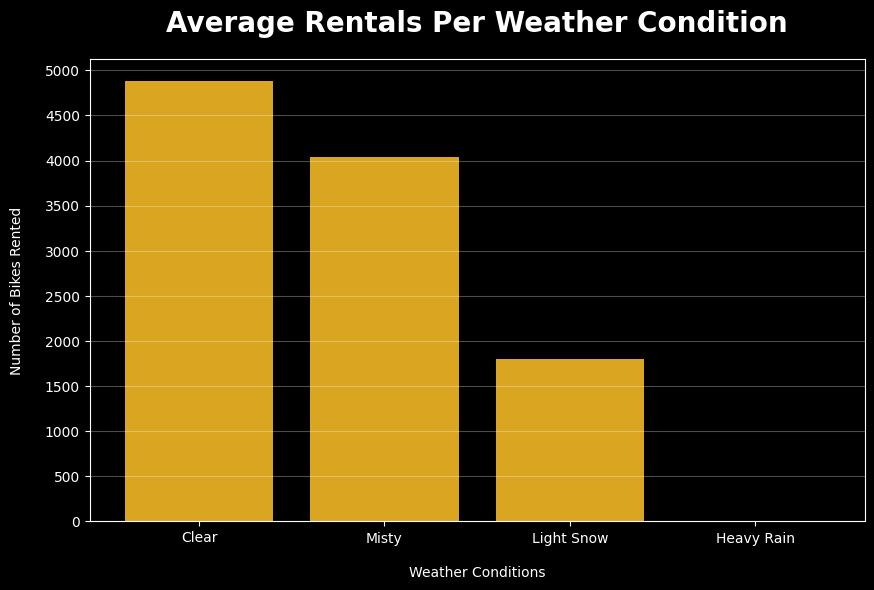

In [41]:
x=df_AverageWeatherRentals.index
y=df_AverageWeatherRentals.values
plt.figure(figsize=(10,6))
plt.grid(True , axis='y', alpha=0.3 , zorder=0)
plt.title('Average Rentals Per Weather Condition' , pad=20, fontsize=20, fontweight='bold')
plt.xlabel('Weather Conditions' , labelpad=15, fontweight=16)
plt.ylabel('Number of Bikes Rented' , labelpad=15, fontweight=16)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))
plt.bar(x,y, color='#DAA520')


<h3>Hourly Patterns (if using the hourly dataset)</h3>

<strong>Which hours are most popular?
Use groupby on hour to average rentals.</strong>

In [42]:
df_hour.head()

,Date,season,Year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [43]:
hourlyPatterns=df_hour.groupby('hr')['count'].mean()

In [44]:
hourlyPatterns

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: count, dtype: float64

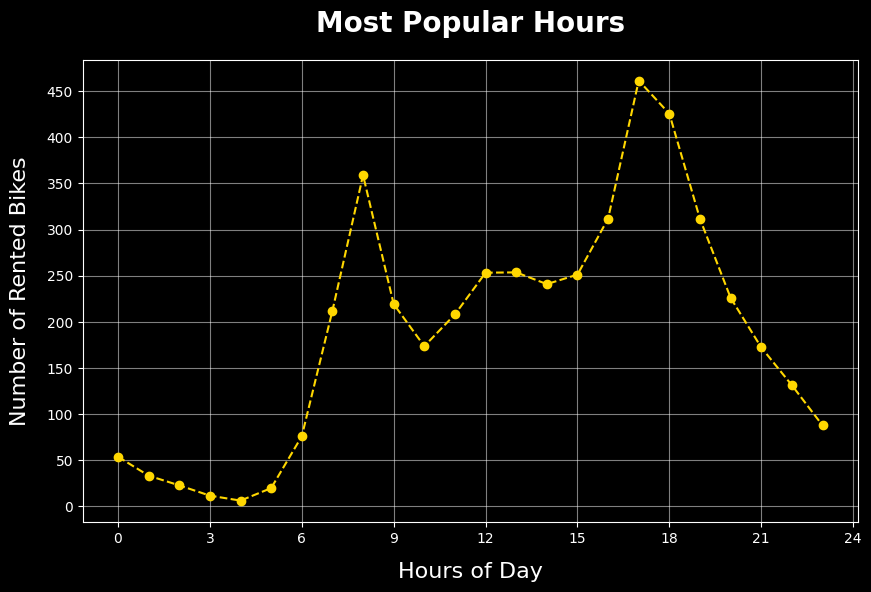

In [45]:
x=hourlyPatterns.index
y= hourlyPatterns.values
plt.figure(figsize=(10,6))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.title('Most Popular Hours' , pad =20 , fontsize=20 , fontweight='bold')
plt.xlabel('Hours of Day' , labelpad=12, fontsize=16)
plt.ylabel('Number of Rented Bikes' , labelpad=12, fontsize=16)
plt.grid(True, alpha=0.5)


plt.plot(x,y, color='gold', marker='o', linestyle='--')

<BarContainer object of 24 artists>

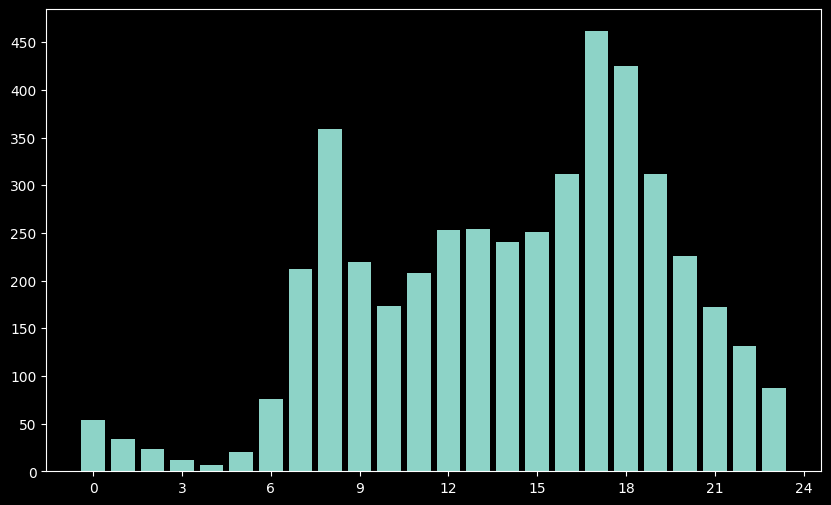

In [49]:
plt.figure(figsize=(10,6))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.bar(x,y)

<h1>TO-DO ✅ Task 9: Compare weekdays vs weekends by hour
Use groupby + pivot to create a multi-line plot.

🧠 Insight Goal:

How do riding patterns change based on type of day?

</h1>